In [1]:
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()
from sklearn.metrics import confusion_matrix, classification_report, precision_score

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_13832\1915275417.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\VeryMildDemented\*')
mild = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\MildDemented\*')
moderate = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\ModerateDemented\*')

#Dataset without Alzheimer
non = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\NonDemented\*')

D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\NonDemented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

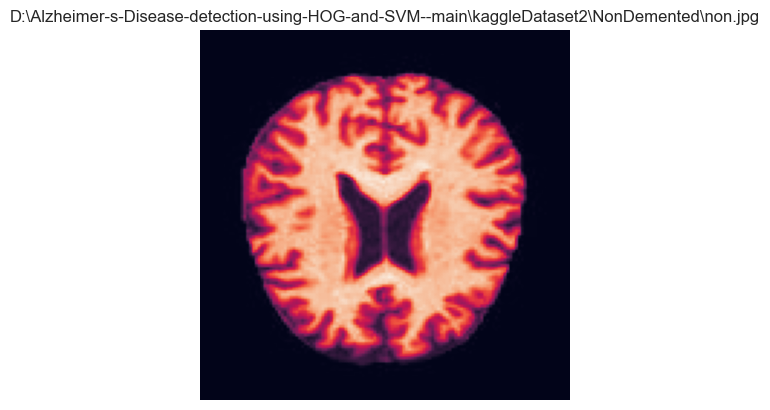

In [3]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[0])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

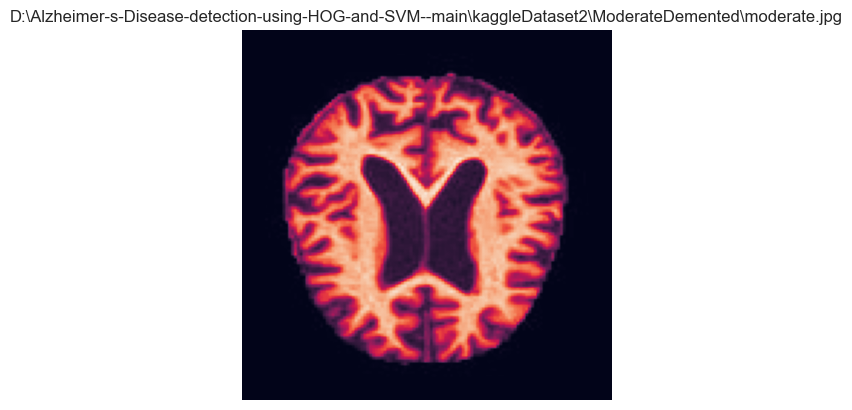

In [4]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[0])

Number of samples before data augmentation:
Non-ALZ: 3200
Very Mild ALZ: 2240
Mild ALZ: 896
Moderate ALZ: 64
Total number of samples before data augmentation: 6400

Number of samples after data augmentation:
Non-ALZ: 9600
Very Mild ALZ: 6720
Mild ALZ: 2688
Moderate ALZ: 192
Total number of samples after data augmentation: 19200

Random Forest Metrics:
Accuracy: 0.83046875
Precision: 0.9027202366339662
Recall: 0.5997124300343031
F1 Score: 0.6476420725192736

Confusion matrix (Random Forest):
[[1849  101    1    0]
 [ 272 1060    1    0]
 [  83  157  275    0]
 [  11   23    2    5]]

K-Nearest Neighbors Metrics:
Accuracy: 0.90625
Precision: 0.9402792432275376
Recall: 0.858498080007045
F1 Score: 0.8944039004751352

Confusion matrix (K-Nearest Neighbors):
[[1869   74    8    0]
 [ 158 1169    6    0]
 [  53   53  409    0]
 [   3    4    1   33]]


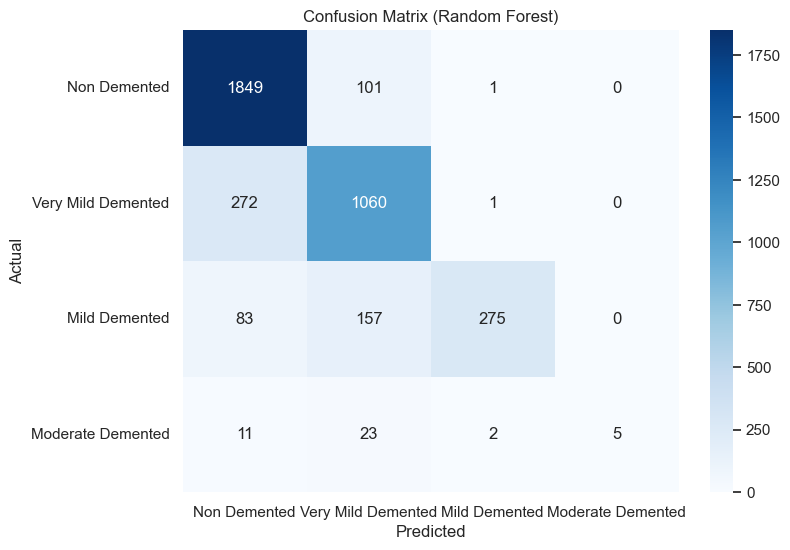

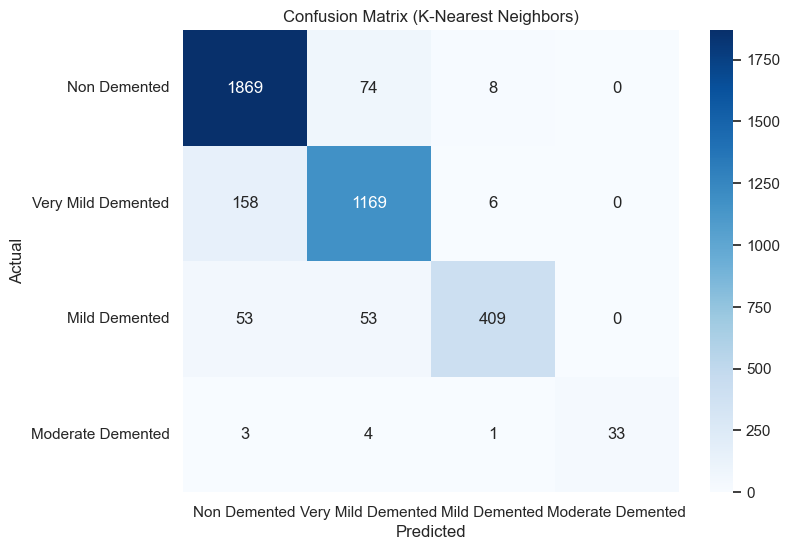

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize
from skimage.transform import rotate
from skimage.transform import rescale
from skimage import img_as_ubyte
from glob import glob
import random
sns.set()

# Function to load and preprocess images
def preprocess_images(filepaths, target_size=(64, 64)):
    features = []
    for filepath in filepaths:
        image = imread(filepath)
        resized_image = resize(image, target_size)  # Resize image
        features.append(resized_image)  # Don't flatten the image
    return np.array(features)

# Function for data augmentation
def data_augmentation(images, target_size=(64, 64)):
    augmented_images = []
    for image in images:
        # Horizontal flip
        flipped_image = np.fliplr(image)
        augmented_images.append(resize(flipped_image, target_size))
        
        # Random rotation
        rotated_image = rotate(image, angle=random.uniform(-20, 20), mode='reflect', preserve_range=True)
        augmented_images.append(resize(rotated_image, target_size))
        
        # Random zoom
        zoomed_image = rescale(image, scale=random.uniform(0.8, 1.2), mode='reflect', preserve_range=True)
        augmented_images.append(resize(zoomed_image, target_size))
        
    return np.array(augmented_images)

# Dataset paths
very_mild = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\VeryMildDemented\*')
mild = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\MildDemented\*')
moderate = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\ModerateDemented\*')
non = glob(r'D:\Alzheimer-s-Disease-detection-using-HOG-and-SVM--main\kaggleDataset2\NonDemented\*')

# Load and preprocess images
non_ALZ_features = preprocess_images(non)
vmild_ALZ_features = preprocess_images(very_mild)
mild_ALZ_features = preprocess_images(mild)
moderate_ALZ_features = preprocess_images(moderate)

print("Number of samples before data augmentation:")
print("Non-ALZ:", len(non_ALZ_features))
print("Very Mild ALZ:", len(vmild_ALZ_features))
print("Mild ALZ:", len(mild_ALZ_features))
print("Moderate ALZ:", len(moderate_ALZ_features))

# Print total number of samples before data augmentation
total_samples_before = len(non_ALZ_features) + len(vmild_ALZ_features) + len(mild_ALZ_features) + len(moderate_ALZ_features)
print("Total number of samples before data augmentation:", total_samples_before)

# Data augmentation
non_ALZ_augmented = data_augmentation(non_ALZ_features)
vmild_ALZ_augmented = data_augmentation(vmild_ALZ_features)
mild_ALZ_augmented = data_augmentation(mild_ALZ_features)
moderate_ALZ_augmented = data_augmentation(moderate_ALZ_features)

print("\nNumber of samples after data augmentation:")
print("Non-ALZ:", len(non_ALZ_augmented))
print("Very Mild ALZ:", len(vmild_ALZ_augmented))
print("Mild ALZ:", len(mild_ALZ_augmented))
print("Moderate ALZ:", len(moderate_ALZ_augmented))

# Print total number of samples after data augmentation
total_samples_after = len(non_ALZ_augmented) + len(vmild_ALZ_augmented) + len(mild_ALZ_augmented) + len(moderate_ALZ_augmented)
print("Total number of samples after data augmentation:", total_samples_after)

# Combine features and labels
X = np.concatenate([non_ALZ_augmented, vmild_ALZ_augmented, mild_ALZ_augmented, moderate_ALZ_augmented])
y = np.concatenate([np.zeros(len(non_ALZ_augmented)), np.ones(len(vmild_ALZ_augmented)), 
                    np.full(len(mild_ALZ_augmented), 2), np.full(len(moderate_ALZ_augmented), 3)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Use Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train_flat, y_train)

# Make predictions using Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_flat)

# Calculate accuracy on testing data using Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Confusion matrix using Random Forest classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion matrix (Random Forest):")
print(cm_rf)

# Use K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the K-Nearest Neighbors classifier
knn_classifier.fit(X_train_flat, y_train)

# Make predictions using K-Nearest Neighbors classifier
y_pred_knn = knn_classifier.predict(X_test_flat)

# Calculate accuracy on testing data using K-Nearest Neighbors classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("\nK-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Confusion matrix using K-Nearest Neighbors classifier
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion matrix (K-Nearest Neighbors):")
print(cm_knn)

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Non Demented", "Very Mild Demented", "Mild Demented", "Moderate Demented"],
            yticklabels=["Non Demented", "Very Mild Demented", "Mild Demented", "Moderate Demented"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Plot confusion matrix for K-Nearest Neighbors classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["Non Demented", "Very Mild Demented", "Mild Demented", "Moderate Demented"],
            yticklabels=["Non Demented", "Very Mild Demented", "Mild Demented", "Moderate Demented"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.show()
